In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
plt.rcParams['figure.figsize']  =(30,10)
plt.rcParams['legend.fontsize'] = 10

(2, 5000)


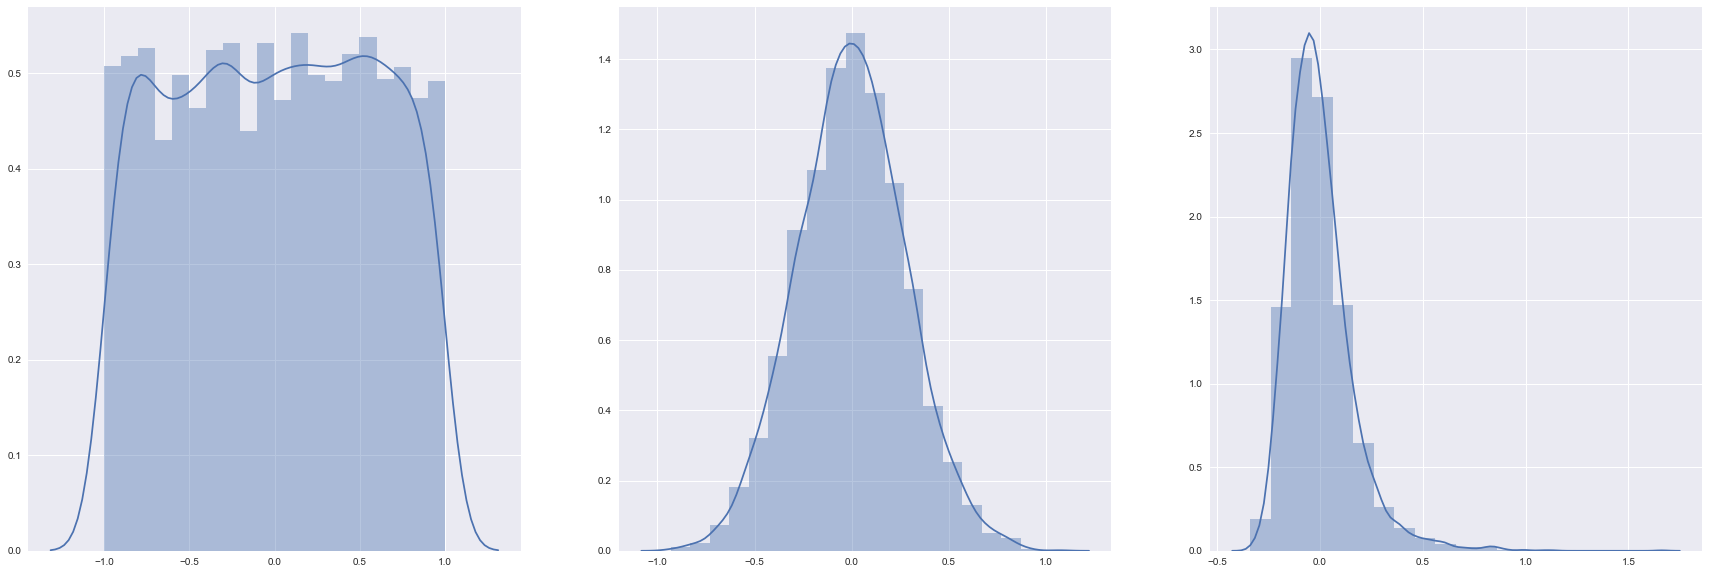

[  2.77111667e-17  -7.10542736e-19   2.22044605e-18] (5000, 3)


In [16]:
size = 5000
data = np.random.rand(3,size)
x = np.random.rand(size)
y = np.random.randn(size,)+np.sqrt(x)
y_= np.random.poisson(lam = 10,size=size)+3*2**y-2
y = np.vstack((y,y_))
print y.shape
z = np.hstack((x.reshape(size,1),y.transpose()))
z -=z.mean(0)
fig,(ax1,ax2,ax3) =plt.subplots(1,3,sharey=False)
for i in range(3):
    z[:,i]/=(max(z[:,i])-min(z[:,i]))/2
#     z[:,i]+= (-1 - min(z[:,i]))
sn.distplot(z[:,0],bins = 20,ax = ax1)
sn.distplot(z[:,1],bins = 20,ax = ax2)
sn.distplot(z[:,2],bins = 20,ax = ax3)
plt.show()
print z.mean(0),z.shape

In [17]:
z=z.T
U,S,V = np.linalg.svd(np.cov(z))
print np.cov(z)

[[ 0.33204863  0.0378456   0.01586827]
 [ 0.0378456   0.07753217  0.03343696]
 [ 0.01586827  0.03343696  0.02579603]]


In [18]:
regroup = np.diag(S)
print S
regroup[2,2]=0.
np.dot(U,np.dot(regroup,V))
print round(np.sum(regroup[:,:])/np.sum(S),3)

[ 0.33891694  0.08709036  0.00936953]
0.978


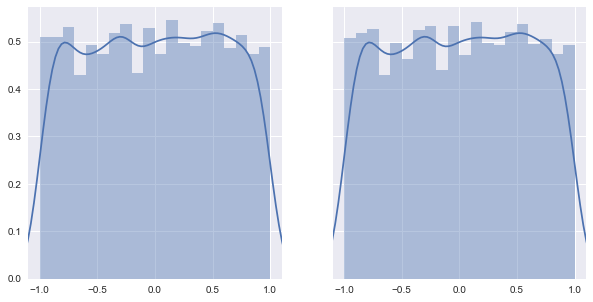

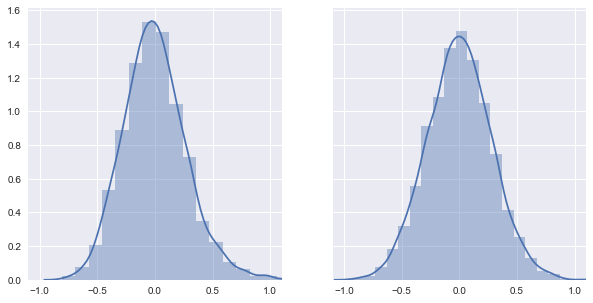

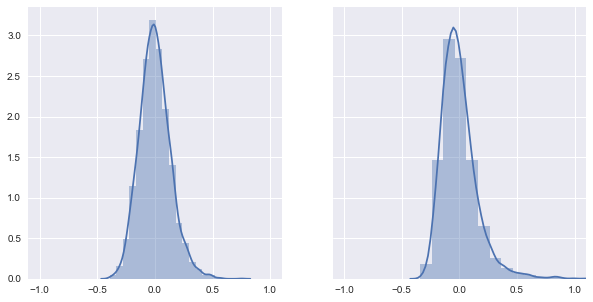

In [25]:
pr = np.dot(U.T,z)
pr_= np.dot(U.T,z)
pr_[2,:]=0.
new=np.dot(U,pr_)
plt.rcParams['figure.figsize']  =(10,5)
for i in range(3):
    fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
    sn.distplot(new[i,:],bins=20,ax=ax1)
    ax1.set_xlim((-1.1,1.1))
    sn.distplot(z[i,:],bins = 20,ax=ax2)
    ax2.set_xlim((-1.1,1.1))
    plt.show()

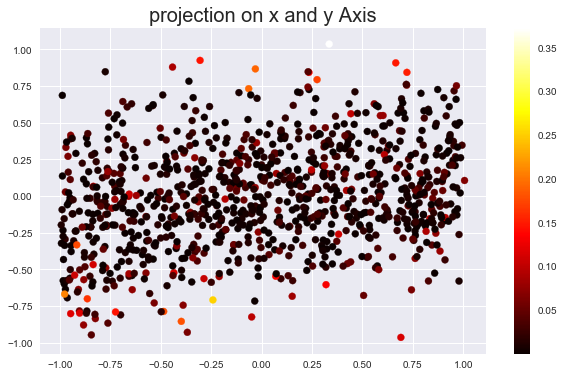

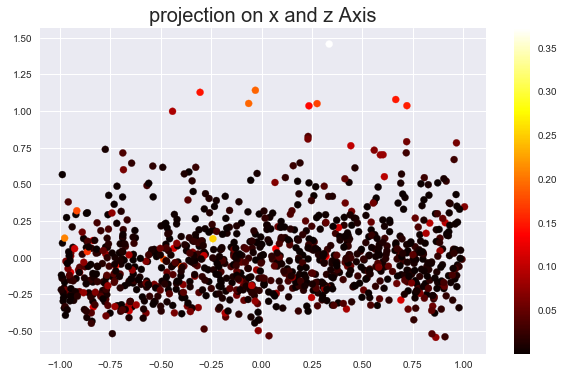

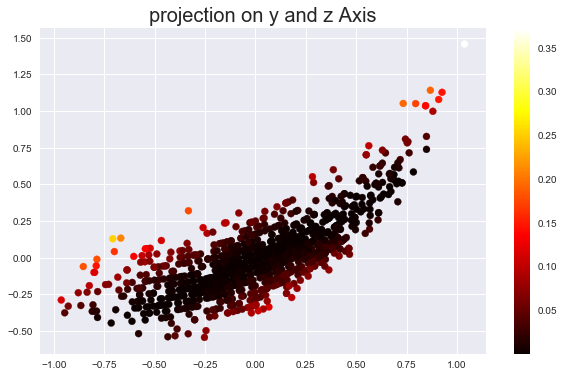

In [13]:
plt.rcParams['figure.figsize']  =(10,6)
fig = plt.figure()
ax = fig.add_subplot(111)
p=ax.scatter(z[0,:],z[1,:],c=np.sum(z**2-new**2,axis=0),cmap='hot')
ax_=fig.colorbar(p)
plt.title('projection on x and y Axis',size=20)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
p=ax.scatter(z[0,:],z[2,:],c=np.sum(z**2-new**2,axis=0),cmap='hot')
ax_=fig.colorbar(p)
plt.title('projection on x and z Axis',size=20)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
p=ax.scatter(z[1,:],z[2,:],c=np.sum(z**2-new**2,axis=0),cmap='hot')
ax_=fig.colorbar(p)
plt.title('projection on y and z Axis',size=20)
plt.show()